 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
csv_path = Path("./whale_returns.csv")
whale_returns_csv = pd.read_csv(csv_path) 
whale_returns_csv.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
whale_returns_csv.set_index(pd.to_datetime(whale_returns_csv['Date'], infer_datetime_format=True), inplace=True)
whale_returns_csv.drop(columns=['Date'], inplace=True)
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns_csv.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [5]:
#count nulls
whale_returns_csv.isnull()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [6]:
whale_returns_csv.dropna(inplace=True)
whale_returns_csv

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [7]:
whale_returns_csv.shape


(1059, 4)

In [8]:
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [9]:
whale_returns_csv.to_csv("./whale_cleansed.csv", index=False)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [10]:
# Reading algorithmic returns
csv_path = Path("./algo_returns.csv")
algo_returns_csv = pd.read_csv(csv_path) 
algo_returns_csv.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [11]:
algo_returns_csv.set_index(pd.to_datetime(algo_returns_csv['Date'], infer_datetime_format=True), inplace=True)
algo_returns_csv.drop(columns=['Date'], inplace=True)
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [12]:
algo_returns_csv.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [13]:
algo_returns_csv.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [14]:
algo_returns_csv.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [15]:
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [16]:
algo_returns_csv.dropna(inplace=True)
algo_returns_csv

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [17]:
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [82]:
algo_returns_csv.to_csv("./algo_cleansed.csv", index=False)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [18]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("./sp500_history.csv")
sp500_df=pd.read_csv(sp500_history_csv)
sp500_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [19]:
# Check Data Types
# YOUR CODE HERE
sp500_df.dtypes


Date     object
Close    object
dtype: object

In [20]:
sp500_df.isnull()

,Date,Close
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1644,False,False
1645,False,False
1646,False,False
1647,False,False


In [21]:
sp500_df.isnull().sum()

Date     0
Close    0
dtype: int64

In [22]:
sp500_df.dropna(inplace=True)
sp500_df

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06
...,...,...
1644,5-Oct-12,$1460.93
1645,4-Oct-12,$1461.40
1646,3-Oct-12,$1450.99
1647,2-Oct-12,$1445.75


In [23]:
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.head()


,Date,Close
Date,,
2019-04-23,23-Apr-19,$2933.68
2019-04-22,22-Apr-19,$2907.97
2019-04-18,18-Apr-19,$2905.03
2019-04-17,17-Apr-19,$2900.45
2019-04-16,16-Apr-19,$2907.06


In [24]:
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [25]:
sp500_df.sort_index(inplace=True)
sp500_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [26]:
sp500_df['Close'] = sp500_df['Close'].map(lambda x: x.lstrip('$'))
sp500_df


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [27]:
sp500_returns = sp500_df.astype(float).pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [28]:
sp500_returns.columns=["SP500"]
sp500_returns.head()

,SP500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [84]:
sp500_returns.to_csv("./sp500_cleansed_csv", index=False)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [30]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_df= pd.concat([whale_returns_csv, algo_returns_csv, sp500_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

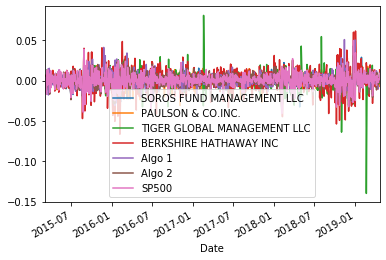

In [31]:
# Plot daily returns
# YOUR CODE HERE
combined_df.plot()

In [32]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928
...,...,...,...,...,...,...,...
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,0.372945
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,0.369823
2019-04-18,0.159278,-0.217322,-0.141222,0.534716,0.923823,0.259590,0.371986


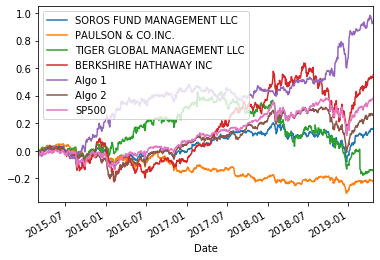

In [33]:
cumulative_returns.plot()

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

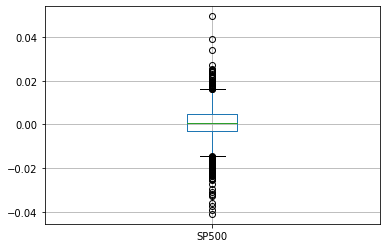

In [34]:
# Box plot to visually show risk
# YOUR CODE HERE
sp500_returns.boxplot()

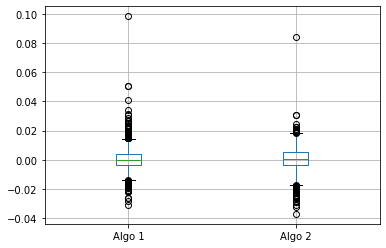

In [35]:
algo_returns_csv.boxplot()

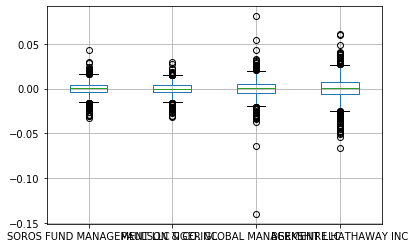

In [36]:
whale_returns_csv.boxplot()

In [37]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
sp500_std=sp500_returns.std()
sp500_std.head()

SP500    0.008111
dtype: float64

In [38]:
whale_std=whale_returns_csv.std()
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [39]:
algo_std=algo_returns_csv.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [40]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

combined_std=combined_df.std()
combined_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

In [41]:
combined_std=combined_std.sort_values(ascending=False)
combined_std.head()

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

In [42]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annual_std=combined_std * np.sqrt(252)
annual_std.head()

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

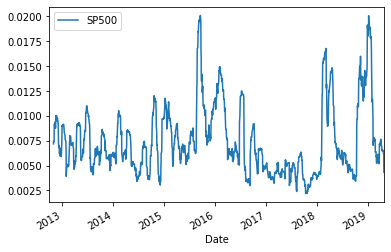

In [43]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_returns.rolling(window=21).std().plot()

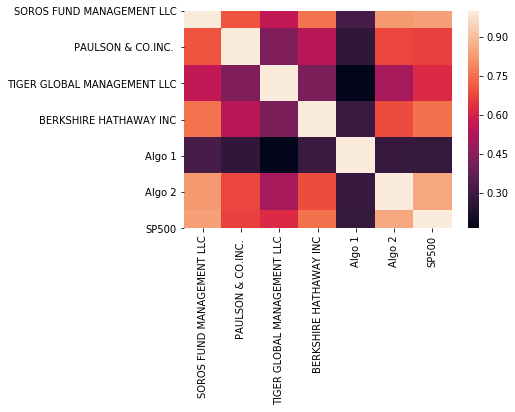

In [44]:
# Correlation for all stocks
# YOUR CODE HERE
correlation=combined_df.corr()
sns.heatmap(correlation)

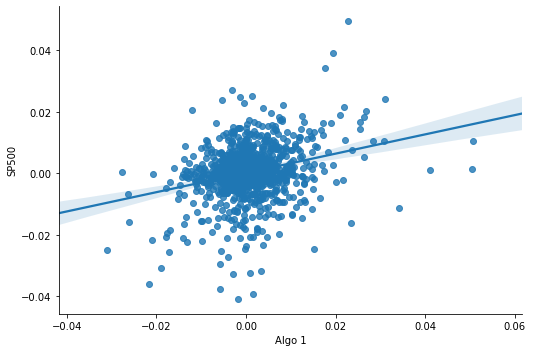

In [45]:
# Correlation for Each Stock
# YOUR CODE HERE

import seaborn as sns
sns.lmplot(x="Algo 1", y= "SP500", data=combined_df, aspect=1.5, fit_reg=True)

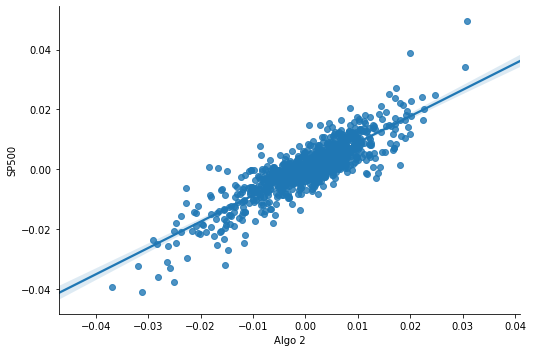

In [46]:
sns.lmplot(x="Algo 2", y= "SP500", data=combined_df, aspect=1.5, fit_reg=True)

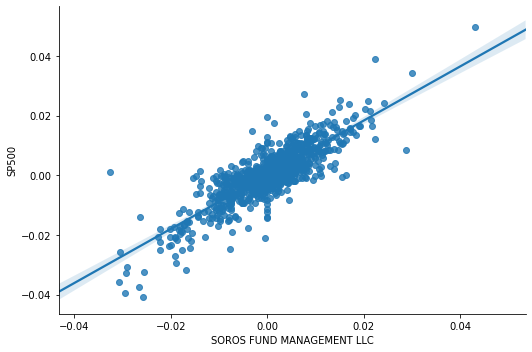

In [47]:
sns.lmplot(x="SOROS FUND MANAGEMENT LLC", y= "SP500", data=combined_df, aspect=1.5, fit_reg=True)

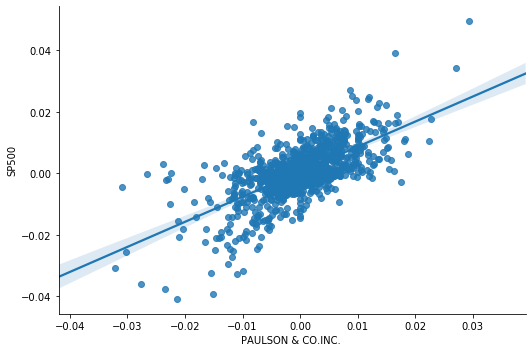

In [48]:
sns.lmplot(x="PAULSON & CO.INC. ", y= "SP500", data=combined_df, aspect=1.5, fit_reg=True)

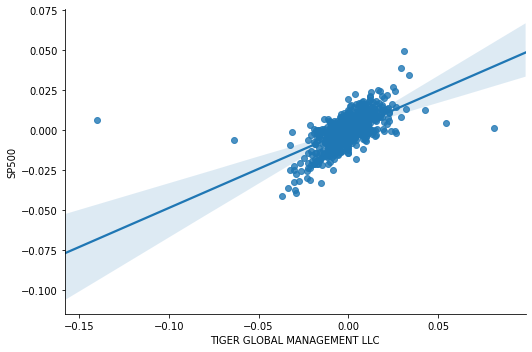

In [49]:
sns.lmplot(x="TIGER GLOBAL MANAGEMENT LLC", y= "SP500", data=combined_df, aspect=1.5, fit_reg=True)

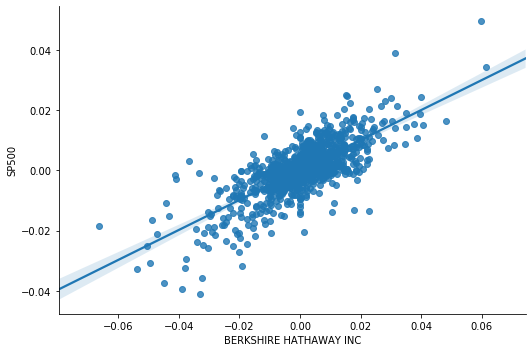

In [50]:
sns.lmplot(x="BERKSHIRE HATHAWAY INC", y= "SP500", data=combined_df, aspect=1.5, fit_reg=True)

In [51]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covarianc=combined_df["BERKSHIRE HATHAWAY INC"].cov(combined_df["SP500"])
covarianc


8.302834941861689e-05

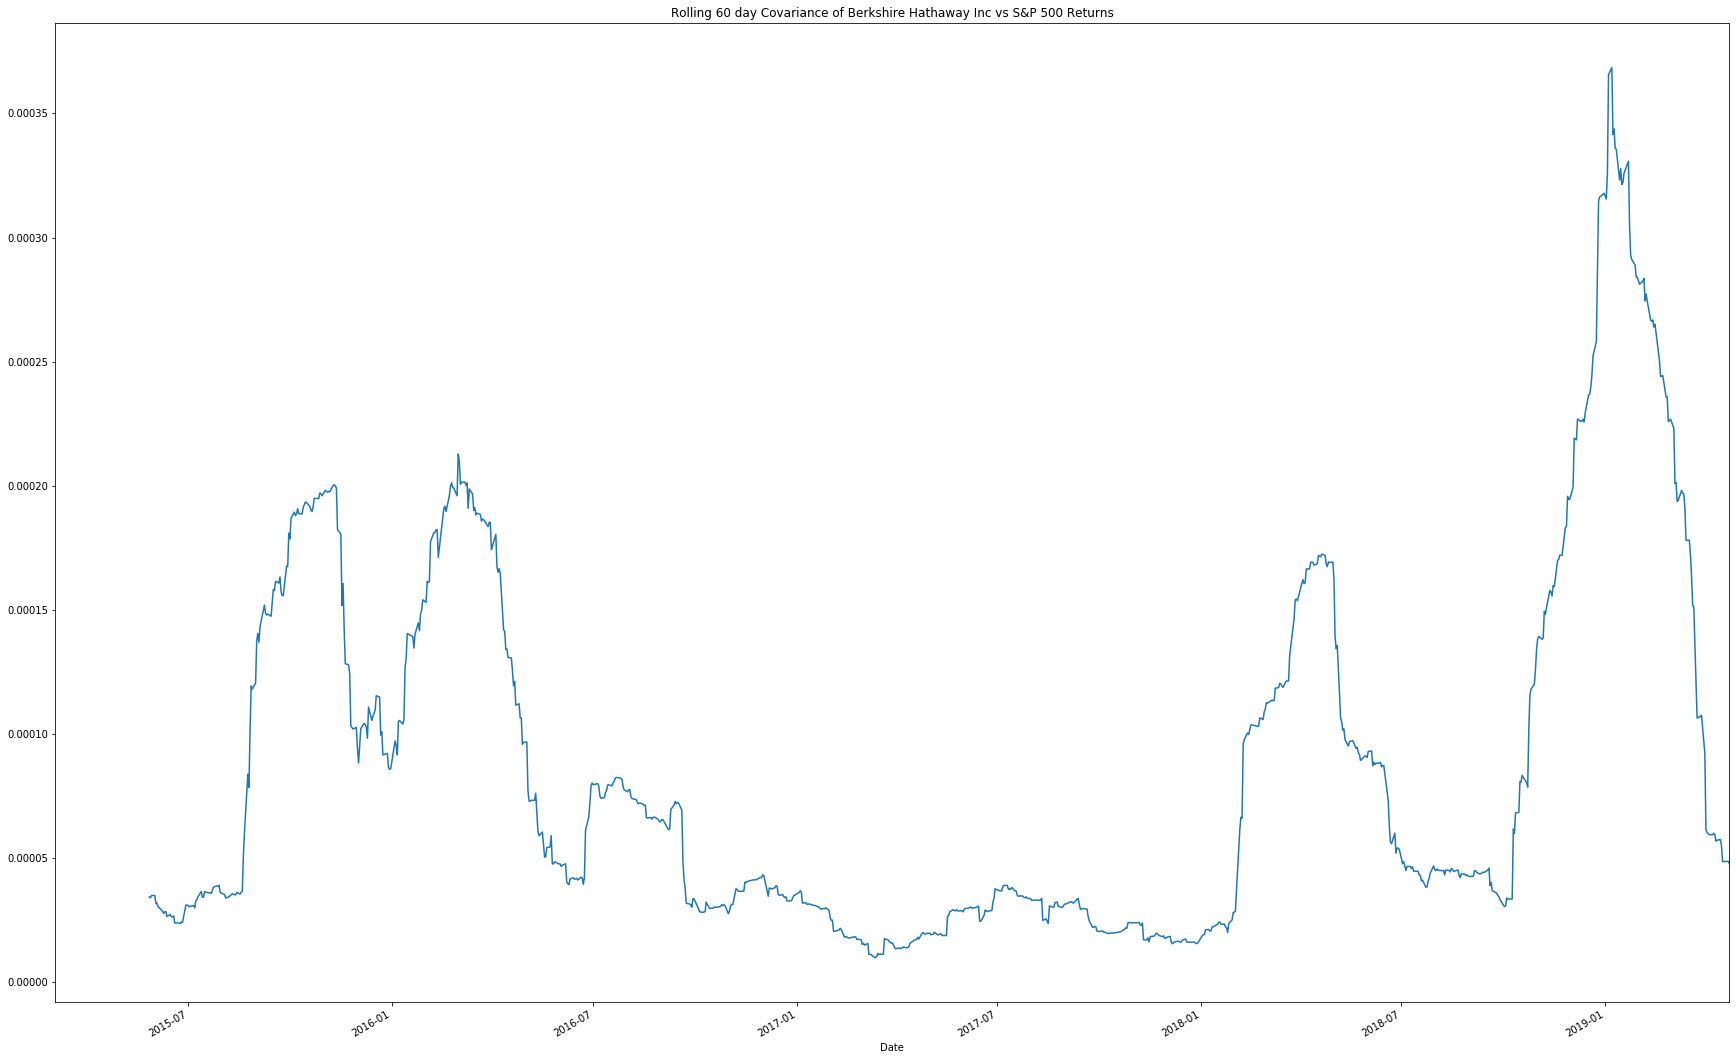

In [52]:
covarinace= combined_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_df["SP500"])
covarinace.plot(figsize=(30,20), title="Rolling 60 day Covariance of Berkshire Hathaway Inc vs S&P 500 Returns")

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [53]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [54]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [55]:
sharpe_ratios= (combined_df.mean()*252)/(combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

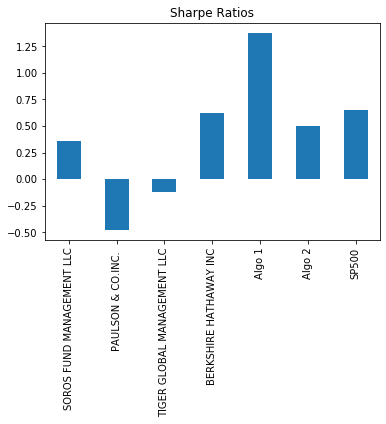

In [56]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [57]:
# Read the first stock
# YOUR CODE HERE
csv_path = Path("./NFLX.csv")
nflx_df=pd.read_csv(
    csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True
)
nflx_df.sort_index(inplace=True)
nflx_df.head()


,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-04-04,$367.88,4621965,$370.07,$372.05,$362.4
2019-04-05,$365.49,3898888,$369,$369.8,$364.66
2019-04-08,$361.41,4648877,$365.11,$365.94,$359.93
2019-04-09,$364.71,5431467,$360.54,$366.74,$359
2019-04-10,$363.92,4537963,$365.79,$368.8481,$362.25


In [58]:
nflx_df.drop(columns=[' Volume', ' Open', ' High', ' Low'], inplace=True)
nflx_df.columns=["NFLX"]
nflx_df


,NFLX
Date,
2019-04-04,$367.88
2019-04-05,$365.49
2019-04-08,$361.41
2019-04-09,$364.71
2019-04-10,$363.92
...,...
2020-03-30,$370.96
2020-03-31,$375.5
2020-04-01,$364.08


In [59]:
#nflx_df=nflx_df('NFLX').str.replace("$","").astype("float")

nflx_df['NFLX'] = nflx_df['NFLX'].map(lambda x: x.lstrip(' $'))
nflx_df


,NFLX
Date,
2019-04-04,367.88
2019-04-05,365.49
2019-04-08,361.41
2019-04-09,364.71
2019-04-10,363.92
...,...
2020-03-30,370.96
2020-03-31,375.5
2020-04-01,364.08


In [60]:
csv_path = Path("./SHELL.csv")
shell_df=pd.read_csv(
    csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True
)
shell_df.sort_index(inplace=True)
shell_df.head()


,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-04-04,$32,950,$31.85,$32,$31.6782
2019-04-05,$32.5,9288,$32.14,$32.61,$31.95
2019-04-08,$32.71,16566,$32.35,$32.995,$32.35
2019-04-09,$31.72,5700,$32.212,$32.78,$31.72
2019-04-10,$32.85,930,$32.37,$32.99,$32.37


In [61]:
shell_df.drop(columns=[' Volume', ' Open', ' High', ' Low'], inplace=True)
shell_df.columns=["SHELL"]
shell_df['SHELL'] = shell_df['SHELL'].map(lambda x: x.lstrip(' $'))

shell_df.head()

,SHELL
Date,
2019-04-04,32
2019-04-05,32.5
2019-04-08,32.71
2019-04-09,31.72
2019-04-10,32.85


In [62]:
csv_path = Path("./AT&T.csv")
att_df=pd.read_csv(
    csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True
)
att_df.sort_index(inplace=True)
att_df.head()


,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-04-04,$31.98,28151460,$31.95,$32.13,$31.92
2019-04-05,$32.35,39905920,$32.07,$32.36,$31.92
2019-04-08,$32.39,37213470,$32.45,$32.515,$32.19
2019-04-09,$31.75,26771390,$31.85,$31.89,$31.54
2019-04-10,$31.88,20273770,$31.75,$32.04,$31.74


In [63]:
att_df.columns

Index([' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [64]:
att_df.drop(columns=[' Volume', ' Open', ' High', ' Low'], inplace=True)
att_df.columns=["AT&T"]
att_df["AT&T"]= att_df['AT&T'].map(lambda x: x.lstrip(' $'))
att_df.head()



,AT&T
Date,
2019-04-04,31.98
2019-04-05,32.35
2019-04-08,32.39
2019-04-09,31.75
2019-04-10,31.88


In [65]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
portfolio_df= pd.concat([nflx_df, att_df, shell_df], axis="columns", join="inner")
portfolio_df.head()

,NFLX,AT&T,SHELL
Date,,,
2019-04-04,367.88,31.98,32
2019-04-05,365.49,32.35,32.5
2019-04-08,361.41,32.39,32.71
2019-04-09,364.71,31.75,31.72
2019-04-10,363.92,31.88,32.85


In [66]:
# Reset the index
# YOUR CODE HERE


In [67]:
# Drop Nulls
# YOUR CODE HERE
portfolio_df.isnull().sum()

NFLX     0
AT&T     0
SHELL    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [68]:
# Calculate weighted portfolio returns
#weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = portfolio_df.astype(float).pct_change()
portfolio_returns.head()

,NFLX,AT&T,SHELL
Date,,,
2019-04-04,NaN,NaN,NaN
2019-04-05,-0.006497,0.011570,0.015625
2019-04-08,-0.011163,0.001236,0.006462
2019-04-09,0.009131,-0.019759,-0.030266
2019-04-10,-0.002166,0.004094,0.035624


In [69]:
weights = [1/3, 1/3, 1/3]
weighted_return=portfolio_returns.dot(weights)
weighted_return.head

<bound method NDFrame.head of Date
2019-04-04         NaN
2019-04-05    0.006899
2019-04-08   -0.001155
2019-04-09   -0.013631
2019-04-10    0.012518
                ...   
2020-03-30    0.037091
2020-03-31    0.004738
2020-04-01   -0.026690
2020-04-02    0.056734
2020-04-03   -0.045813
Length: 253, dtype: float64>

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [70]:
# YOUR CODE HERE
joined_data=pd.concat([combined_df, portfolio_returns], axis='columns', join='inner')
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,NFLX,AT&T,SHELL
Date,,,,,,,,,,
2019-04-04,0.001255,0.010630,0.008459,-0.008037,-0.003597,0.003265,0.002085,NaN,NaN,NaN
2019-04-05,0.006880,0.006484,0.009357,0.006128,0.001519,0.009306,0.004636,-0.006497,0.011570,0.015625
2019-04-08,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.001047,-0.011163,0.001236,0.006462
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639,-0.006067,0.009131,-0.019759,-0.030266
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,0.003478,-0.002166,0.004094,0.035624


In [71]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
joined_port = joined_data.apply (pd.to_numeric, errors='coerce')
joined_port= joined_data.dropna()
joined_port.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,NFLX,AT&T,SHELL
Date,,,,,,,,,,
2019-04-05,0.006880,0.006484,0.009357,0.006128,0.001519,0.009306,0.004636,-0.006497,0.011570,0.015625
2019-04-08,0.000483,-0.000310,0.000153,0.000841,0.003761,0.000218,0.001047,-0.011163,0.001236,0.006462
2019-04-09,-0.005657,-0.004396,-0.006536,-0.002497,0.012012,-0.011639,-0.006067,0.009131,-0.019759,-0.030266
2019-04-10,0.009808,0.008366,0.002912,0.005269,-0.004221,0.009632,0.003478,-0.002166,0.004094,0.035624
2019-04-11,0.003406,-0.003959,-0.000637,-0.000496,0.001705,-0.001568,0.000038,0.010250,0.010038,-0.010654


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [72]:
# Risk
# YOUR CODE HERE
risk=joined_port.std()*np.sqrt(252)
risk

SOROS FUND MANAGEMENT LLC      0.074954
PAULSON & CO.INC.              0.076768
TIGER GLOBAL MANAGEMENT LLC    0.072170
BERKSHIRE HATHAWAY INC         0.093230
Algo 1                         0.096438
Algo 2                         0.105273
SP500                          0.063010
NFLX                           0.370578
AT&T                           0.137090
SHELL                          0.291209
dtype: float64

In [73]:
# Rolling
# YOUR CODE HERE
joined_port.rolling(window=7).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,NFLX,AT&T,SHELL
Date,,,,,,,,,,
2019-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,0.002737,0.000552,0.001409,0.000867,0.000706,0.000840,0.001302,-0.007402,0.000227,0.000640
2019-04-16,0.002140,-0.000319,-0.000046,0.000111,-0.000503,-0.000075,0.000712,-0.002138,-0.000400,-0.002037
2019-04-17,0.001657,-0.001198,-0.000698,0.000451,-0.002512,-0.000853,0.000238,-0.002419,-0.001905,-0.001799


In [74]:
# Beta
# YOUR CODE HERE
cov=joined_port["NFLX"].cov(joined_port["SP500"])
cov

-2.14320306864663e-05

In [75]:
var=joined_port["NFLX"].var()
var

0.0005449533917240699

In [76]:
nflx_beta= cov/var
nflx_beta

-0.0393281902855247

In [77]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sh_ratio_port= (joined_port.mean()*252)/(joined_port.std() * np.sqrt(252))
sh_ratio_port

SOROS FUND MANAGEMENT LLC      7.002126
PAULSON & CO.INC.             -1.324276
TIGER GLOBAL MANAGEMENT LLC    2.338239
BERKSHIRE HATHAWAY INC         5.458018
Algo 1                        -1.577493
Algo 2                         1.996704
SP500                          6.259024
NFLX                           2.291008
AT&T                           0.636962
SHELL                          1.029462
dtype: float64

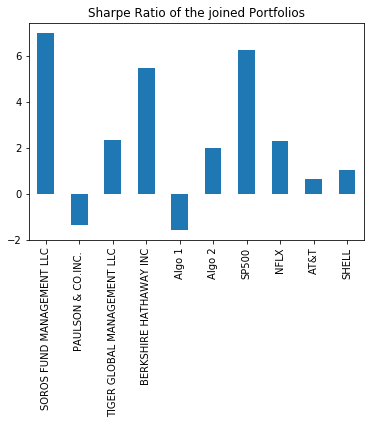

In [78]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sh_ratio_port.plot(kind="bar", title="Sharpe Ratio of the joined Portfolios")


## Include correlation analysis to determine which stocks (if any) are correlated

In [79]:
# YOUR CODE HERE

In [80]:
portfolio_correlation= joined_data.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,NFLX,AT&T,SHELL
SOROS FUND MANAGEMENT LLC,1.000000,0.663721,0.741094,0.627451,-0.171699,0.932956,0.826736,-0.255676,0.704547,0.513344
PAULSON & CO.INC.,0.663721,1.000000,0.839201,0.104140,-0.083387,0.724831,0.519090,-0.200584,0.480842,0.374635
TIGER GLOBAL MANAGEMENT LLC,0.741094,0.839201,1.000000,0.283308,-0.111357,0.831072,0.794277,-0.347561,0.632073,0.368989
BERKSHIRE HATHAWAY INC,0.627451,0.104140,0.283308,1.000000,0.072578,0.600982,0.654135,-0.204641,0.314644,0.401573
Algo 1,-0.171699,-0.083387,-0.111357,0.072578,1.000000,-0.206371,-0.136774,0.250557,-0.242529,-0.359330
Algo 2,0.932956,0.724831,0.831072,0.600982,-0.206371,1.000000,0.892671,-0.147140,0.719183,0.648209
SP500,0.826736,0.519090,0.794277,0.654135,-0.136774,0.892671,1.000000,-0.231298,0.589597,0.463940
NFLX,-0.255676,-0.200584,-0.347561,-0.204641,0.250557,-0.147140,-0.231298,1.000000,0.138736,-0.012547
AT&T,0.704547,0.480842,0.632073,0.314644,-0.242529,0.719183,0.589597,0.138736,1.000000,0.445646
SHELL,0.513344,0.374635,0.368989,0.401573,-0.359330,0.648209,0.463940,-0.012547,0.445646,1.000000


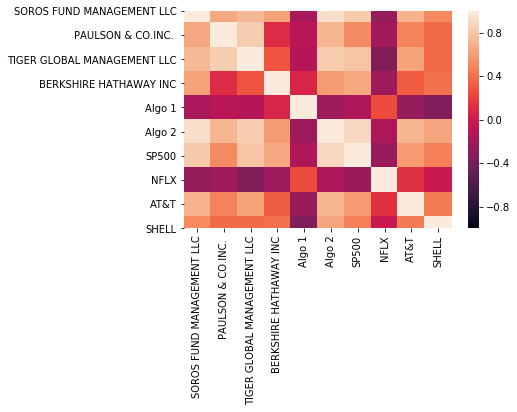

In [81]:
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1)